## <b> Problem Description </b>

### ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

### Users can like, comment and share the videos on the platform. 

### Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

### Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

# **Business Objective:**

## ** The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.**

In [1]:
#!pip install optuna 
import optuna

In [2]:
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('../input/jobathonfebruary2022/train_0OECtn8.csv')
test  = pd.read_csv('../input/jobathonfebruary2022/test_1zqHu22.csv')
sub = pd.read_csv('../input/jobathonfebruary2022/sample_submission_JPlpRcN.csv')

# **Understand More About The Data**

In [4]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [5]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [6]:
sub.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [7]:
# View the data of bottom 5 rows to take a glimps of the data
train.tail()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77
89196,89197,27183,25,150,13,Male,Student,240,317,4.31


In [8]:
test.tail()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628
11120,100318,967,8,74,33,Male,Working Professional,280,628


In [9]:
sub.tail()

,row_id,engagement_score
11116,100314,5.0
11117,100315,5.0
11118,100316,5.0
11119,100317,5.0
11120,100318,5.0


### As the train and test data set all features are same here we are going to display only the train data set feature names and sample data set feature names 

In [10]:
#Getting the shape of dataset with rows and columns
print(train.shape)

(89197, 10)


In [11]:
#Getting the shape of dataset with rows and columns
print(test.shape)

(11121, 9)


In [12]:
#Getting the shape of dataset with rows and columns
print(sub.shape)

(11121, 2)


In [13]:
#Getting all the columns
print("Features of the dataset:")
train.columns

Features of the dataset:


Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [14]:
#Getting all the columns
print("Features of the dataset:")
sub.columns

Features of the dataset:


Index(['row_id', 'engagement_score'], dtype='object')

In [15]:
#check details about the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [16]:
#check details about the data set
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            11121 non-null  int64  
 1   engagement_score  11121 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 173.9 KB


In [17]:
#print the unique value
test.nunique()

row_id         11121
user_id        10384
category_id       23
video_id         128
age               53
gender             2
profession         3
followers         15
views             21
dtype: int64

In [18]:
#print the unique value
train.nunique()

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

In [19]:
#print the unique value
sub.nunique()

row_id              11121
engagement_score        1
dtype: int64

In [20]:
#Looking for the description of the dataset to get insights of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,89197.0,44599.000000,25749.100318,1.0,22300.0,44599.00,66898.00,89197.0
user_id,89197.0,13881.909806,8005.582771,1.0,6945.0,13892.00,20819.00,27734.0
category_id,89197.0,18.323733,11.675154,1.0,8.0,16.00,26.00,47.0
video_id,89197.0,77.715383,48.469656,1.0,34.0,76.00,120.00,175.0
age,89197.0,24.848616,8.955535,10.0,18.0,23.00,32.00,68.0
followers,89197.0,252.460172,46.094468,160.0,230.0,240.00,280.00,360.0
views,89197.0,502.980268,268.569482,30.0,229.0,467.00,714.00,1000.0
engagement_score,89197.0,3.487797,0.863498,0.0,2.9,3.71,4.15,5.0


In [21]:
#Looking for the description of the dataset to get insights of the data
test.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,11121.0,94758.000000,3210.500506,89198.0,91978.0,94758.0,97538.0,100318.0
user_id,11121.0,13825.707400,8001.221954,2.0,6881.0,13857.0,20763.0,27734.0
category_id,11121.0,15.666487,10.313259,1.0,8.0,12.0,25.0,46.0
video_id,11121.0,79.742559,48.702501,1.0,39.0,80.0,121.0,174.0
age,11121.0,24.854150,8.953976,10.0,18.0,23.0,32.0,68.0
followers,11121.0,249.691574,38.511469,160.0,230.0,240.0,270.0,360.0
views,11121.0,454.959986,249.759038,44.0,229.0,369.0,662.0,990.0


In [22]:
#Looking for the description of the dataset to get insights of the data
sub.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,11121.0,94758.0,3210.500506,89198.0,91978.0,94758.0,97538.0,100318.0
engagement_score,11121.0,5.0,0.000000,5.0,5.0,5.0,5.0,5.0


# **Preprocessing the dataset**

### **Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

## Missing values

In [23]:
#check for count of missing values in each column.
train.isna().sum()
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [24]:
#check for count of missing values in each column.
test.isna().sum()
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [25]:
#check for count of missing values in each column.
sub.isna().sum()
sub.isnull().sum()

row_id              0
engagement_score    0
dtype: int64

In [26]:
target = 'engagement_score'
categorical_cols=['gender', 'profession', 'age']
continous_cols=['followers', 'views']

## Encode categorical features

In [27]:
for e in categorical_cols:
    le = LabelEncoder()
    train[e]=le.fit_transform(train[e])
    test[e]=le.transform(test[e])

In [28]:
data=train[categorical_cols+continous_cols]
target=train[target]

In [29]:
data.head()

,gender,profession,age,followers,views
0,1,1,14,180,1000
1,0,1,4,330,714
2,1,1,9,180,138
3,1,1,9,220,613
4,1,2,17,220,613


In [30]:
def objective(trial,data=data,target=target):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [31]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-02-12 11:28:45,565] A new study created in memory with name: no-name-8af0c75c-ff6e-4df8-9e0b-bff403116211
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-02-12 11:28:50,941] Trial 0 finished with value: 0.6976901352959558 and parameters: {'reg_alpha': 0.009909047627180272, 'reg_lambda': 0.058530587255889194, 'colsample_bytree': 0.9, '

Number of finished trials: 50
Best trial: {'reg_alpha': 0.05638684894164527, 'reg_lambda': 0.026131392384287067, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 49, 'min_child_samples': 30, 'min_data_per_groups': 44}


In [32]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_samples,params_min_data_per_groups,params_num_leaves,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,0.697690,2022-02-12 11:28:45.566685,2022-02-12 11:28:50.941227,0 days 00:00:05.374542,0.9,0.017,20,273,79,226,0.009909,0.058531,0.5,COMPLETE
1,1,0.705127,2022-02-12 11:28:50.945165,2022-02-12 11:29:01.499447,0 days 00:00:10.554282,0.4,0.014,20,244,19,449,0.005390,5.184727,0.6,COMPLETE
2,2,0.705157,2022-02-12 11:29:01.501135,2022-02-12 11:29:13.254598,0 days 00:00:11.753463,0.4,0.010,20,86,1,801,0.087294,0.320666,0.8,COMPLETE
3,3,0.696545,2022-02-12 11:29:13.257320,2022-02-12 11:29:18.172114,0 days 00:00:04.914794,0.5,0.020,20,215,32,613,3.255152,1.943881,1.0,COMPLETE
4,4,0.696611,2022-02-12 11:29:18.176662,2022-02-12 11:29:30.670263,0 days 00:00:12.493601,0.5,0.010,100,253,12,750,4.234224,1.220493,1.0,COMPLETE
5,5,0.696776,2022-02-12 11:29:30.672273,2022-02-12 11:29:49.804898,0 days 00:00:19.132625,0.6,0.006,100,272,22,608,0.001112,0.706150,0.7,COMPLETE
6,6,0.697225,2022-02-12 11:29:49.806846,2022-02-12 11:30:00.563357,0 days 00:00:10.756511,0.7,0.008,100,160,16,235,0.792008,0.004044,0.4,COMPLETE
7,7,0.705079,2022-02-12 11:30:00.565450,2022-02-12 11:30:14.132164,0 days 00:00:13.566714,0.4,0.010,20,271,52,443,0.202603,0.006292,0.7,COMPLETE
8,8,0.696458,2022-02-12 11:30:14.134292,2022-02-12 11:30:21.561563,0 days 00:00:07.427271,0.6,0.014,10,203,68,566,0.001431,0.639296,0.8,COMPLETE
9,9,0.697538,2022-02-12 11:30:21.565325,2022-02-12 11:30:28.186454,0 days 00:00:06.621129,0.9,0.010,20,31,70,389,1.458520,0.005333,1.0,COMPLETE


In [33]:
optuna.visualization.plot_optimization_history(study)

In [34]:
optuna.visualization.plot_parallel_coordinate(study)

In [35]:

optuna.visualization.plot_slice(study)

In [36]:
optuna.visualization.plot_contour(study, params=['num_leaves',
                            'max_depth',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [37]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [38]:

optuna.visualization.plot_edf(study)

In [39]:
params=study.best_params   
params['random_state'] = 48
params['n_estimators'] = 20000 
params['metric'] = 'rmse'

In [40]:
params['cat_smooth'] = params.pop('min_data_per_groups')

In [41]:
params

{'reg_alpha': 0.05638684894164527,
 'reg_lambda': 0.026131392384287067,
 'colsample_bytree': 0.5,
 'subsample': 0.6,
 'learning_rate': 0.017,
 'max_depth': 10,
 'num_leaves': 49,
 'min_child_samples': 30,
 'random_state': 48,
 'n_estimators': 20000,
 'metric': 'rmse',
 'cat_smooth': 44}

In [42]:
target = 'engagement_score'
categorical_cols=['gender', 'profession', 'age']
continous_cols=['followers', 'views']

In [43]:
columns = categorical_cols+continous_cols
preds = np.zeros(test.shape[0])
kf = KFold(n_splits=5,random_state=48,shuffle=True)
rmse=[]  # list contains rmse for each fold
n=0
for trn_idx, test_idx in kf.split(train[columns],train[target]):
    X_tr,X_val=train[columns].iloc[trn_idx],train[columns].iloc[test_idx]
    y_tr,y_val=train[target].iloc[trn_idx],train[target].iloc[test_idx]
    model = LGBMRegressor(**params)
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=False)
    preds+=model.predict(test[columns])/kf.n_splits
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    print(n+1,rmse[n])
    n+=1

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



1 0.7012094272685213


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



2 0.6957596739963725


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



3 0.6893536499827436


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



4 0.6928911834363359


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



5 0.6948740469725828


In [44]:
np.mean(rmse)

0.6948175963313112

In [45]:
import matplotlib.pyplot as plt

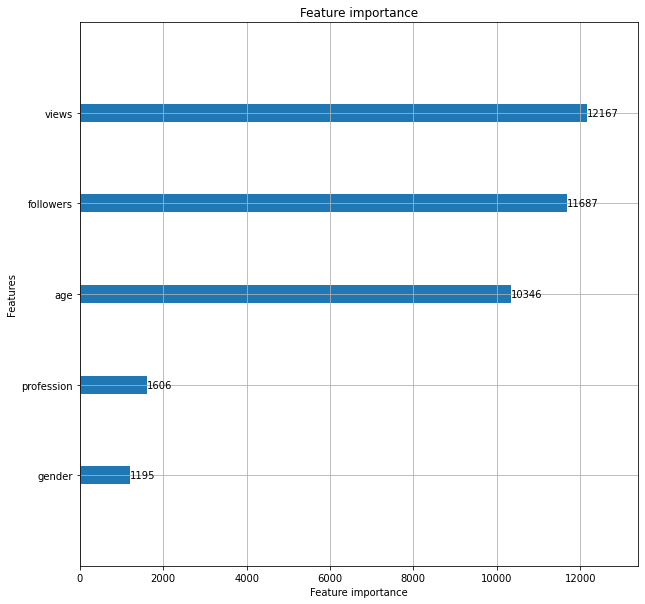

In [46]:
from optuna.integration import lightgbm as lgb
lgb.plot_importance(model, max_num_features=10, figsize=(10,10))
plt.show()


# Submission

In [47]:
submission = pd.DataFrame( columns=sub.columns)
test_df = pd.read_csv('../input/jobathonfebruary2022/test_1zqHu22.csv')
submission['row_id'] = test_df['row_id']

In [48]:

submission['engagement_score'] = preds
submission.to_csv('submission_automl.csv', index=False)
submission.to_csv('submission.csv', index=False)
submission

,row_id,engagement_score
0,89198,4.114163
1,89199,3.744232
2,89200,2.681536
3,89201,3.895608
4,89202,2.251240
...,...,...
11116,100314,3.930622
11117,100315,3.472353
11118,100316,3.862241
11119,100317,3.725918
